# Hiv(Non-Aids) Cases
- This is a dataset that contain all the county with reported cases on having Hiv Non-Aids.
- The Hiv Non-Aids has 3 columns 1st is the county, 2nd is HIV (NON-AIDS) CASES LIVING AS OF 2/28/2023, 3rd AIDS CASES LIVING AS OF  2/28/2023
- This dataset is based on helping identify the Non-Aids and Aids individuals and show how many are on a certail county
- we will be using selenium to scrape the real time data for better understading and reading of the table rows and columns
- store it in a csv file for better retrival and manipulation of the data
- perform Extrapolatory Data Analysis to get better insight, correalation.
- plot some visualization for better storytelling and better undestanding of the data

In [143]:
# importing packages
import csv
import time
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pivottablejs import pivot_ui
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.wait import WebDriverWait
from selenium.common import NoSuchElementException
plt.style.use('seaborn-v0_8-whitegrid')
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
!pip install fireducks

In [12]:
# using selenium to extract the data realtime
driver = webdriver.Chrome()
driver.maximize_window
driver.get(
    url="https://dph.illinois.gov/topics-services/diseases-and-conditions/hiv-aids/hiv-surveillance/update-reports/2023/february.html")

# Waiting for the Table to load
TableWait = WebDriverWait(driver, 10)
table = TableWait.until(EC.presence_of_element_located((By.XPATH, "//table[@id='DataTables_Table_11']")))

# getting how many details are on the data
Tabledata = driver.find_element(By.CSS_SELECTOR, "#DataTables_Table_11_info").text
start_Text = Tabledata.find("of") + 3
last_Text = Tabledata.find("entries") -1
No_entries = int(Tabledata[start_Text:last_Text].strip())
print(f"Total number of entries: {(No_entries)}")

data = []
for No_entries in range(1, No_entries +1):
    try:
        table = TableWait.until(EC.presence_of_element_located((By.XPATH, "//table[@id='DataTables_Table_11']")))

        # finding the elements on the data
        datarow = table.find_elements(By.XPATH, ".//tbody/tr")
        for _ in datarow:
            cells = _.find_elements(By.XPATH, ".//td")
            row = [cell.text for cell in cells]
            data.append(row)


        # checking if the last entry on the table is Illinois
        if any('Illinois' in datarow for datarow in data):
            break

        # next button click
        next_button = driver.find_element(By.ID, "DataTables_Table_11_next")
        if "disabled" in next_button.get_attribute('class'):
            break
        next_button.click()

        time.sleep(10)
        
    except NoSuchElementException as e:
        print(f"Error: {e}")
        break

print()
for row in data:
    print(row)

# writing the file to csv format
with open('Hiv(Non)AidsCases.csv', 'w', newline='', encoding='utf-8') as f:
    writer = csv.writer(f)
    if data:
        writer.writerow(['County', 'HIV (NON-AIDS) CASES LIVING AS OF 2/28/2023', 'AIDS CASES LIVING'])
    writer.writerows(data)

print()
print('Data saved Successfully on the csv format')
    
time.sleep(5)
driver.quit()

Total number of entries: 104

['Adams', '26', '29']
['Alexander', '15', '9']
['Bond', '7', '12']
['Boone', '22', '16']
['Brown', '14', '17']
['Bureau', '12', '5']
['Calhoun', '3', '0']
['Carroll', '1', '3']
['Cass', '10', '2']
['Champaign', '256', '207']
['Christian', '17', '17']
['Clark', '2', '7']
['Clay', '5', '3']
['Clinton', '22', '31']
['Coles', '26', '22']
['Cook', '16000', '14277']
['Crawford', '23', '19']
['Cumberland', '3', '2']
['DeKalb', '75', '47']
['De Witt', '4', '5']
['Douglas', '1', '1']
['DuPage', '572', '440']
['Edgar', '4', '6']
['Edwards', '1', '3']
['Effingham', '3', '10']
['Fayette', '24', '28']
['Ford', '2', '3']
['Franklin', '12', '23']
['Fulton', '26', '25']
['Gallatin', '3', '2']
['Greene', '2', '3']
['Grundy', '15', '12']
['Hamilton', '1', '4']
['Hancock', '0', '2']
['Hardin', '2', '2']
['Henderson', '1', '0']
['Henry', '13', '24']
['Iroquois', '3', '9']
['Jackson', '57', '40']
['Jasper', '1', '3']
['Jefferson', '30', '18']
['Jersey', '8', '3']
['Jo Daviess'

# Table 2 
## Health Departments that contain high cases on Hiv(Non-Aids) and Aids Cases
- Extracting data from Health Department table that has:
  1. Health Department
  2. Hiv(Non-Aids)
  3. Aids Cases
- using selenium we will extract all the content from the table and save it to a csv format

In [11]:
browser = webdriver.Chrome()
browser.fullscreen_window
browser.get(
    url="https://dph.illinois.gov/topics-services/diseases-and-conditions/hiv-aids/hiv-surveillance/update-reports/2023/february.html")
TableHealth = browser.find_element(By.XPATH, "//table[@id='DataTables_Table_4']")
RowHealth = TableHealth.find_elements(By.XPATH, ".//tbody/tr")
RowCount = len(RowHealth)
print(f"No of rows: {RowCount}")

data = []
for _ in RowHealth:
    cell = _.find_elements(By.XPATH, ".//td")
    row = [cells.text for cells in cell]
    data.append(row)

print()
for row in data:
    print(row)

# writting file to csv format
with open('Heath Deaprtment Hiv(Non-Aids).csv', 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    if data:
        writer.writerow(['Heath Department', 'HIV (NON-AIDS) CASES LIVING AS OF 2/28/2023', 'AIDS CASES LIVING'])
    writer.writerows(data)
print()
print('Data saved successfully')
time.sleep(10)
browser.quit()

No of rows: 5

['Chicago Health Dept.', '13071', '11396']
['Cook Co. Health Dept.', '2677', '2579']
['Evanston Health Dept.', '116', '135']
['Oak Park Health Dept.', '99', '121']
['Skokie Health Dept.', '37', '46']

Data saved successfully


# Table 3
## St.Clair County Breakdown
- A table containing St.Clair County Breakdown Health department that has the highest cases on Both Hiv(Non-Aids) and Aids Cases
- using selenium we extract the data real time and save the data in a csv format 

In [ ]:
browser = webdriver.Chrome()
browser.maximize_window
browser.get(
    url="https://dph.illinois.gov/topics-services/diseases-and-conditions/hiv-aids/hiv-surveillance/update-reports/2023/february.html")
TableBreakdown = browser.find_element(By.XPATH, "//table[@id='DataTables_Table_5']")
TableRowBreakdown = TableBreakdown.find_elements(By.XPATH, ".//tbody/tr")
RowBreakdown = len(TableRowBreakdown)
print(f"No of Rows: {RowBreakdown}")
print()

data = []
for _ in TableRowBreakdown:
    cell = _.find_elements(By.XPATH, ".//td")
    row = [cells.text for cells in cell]
    data.append(row)

for row in data:
    print(row)

# writting the file to csv format
with open('St Clair County Breakdown.csv', 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    if data:
        writer.writerow(['HEALTH DEPARTMENT', 'HIV (NON-AIDS) CASES LIVING AS OF 2/28/2023', 'AIDS CASES LIVING AS OF 2/28/2023'])
    writer.writerows(data)

print()
print('Data Saved successfully')

time.sleep(15)
browser.quit()

# Extrapolatory Data Analysis
- finding hidden details
- checking correlation between numerical values

In [ ]:
# Hiv (Non-Aids) and Aids Cases

In [13]:
df = pd.read_csv('Hiv(Non)AidsCases.csv')
df1_copy = df.copy()

In [115]:
pivot_ui(df1_copy)

In [15]:
# renaming columns
df1_copy.rename(
    columns = {"AIDS CASES LIVING AS OF 2/28/2023": "Aids Cases Living",
              "HIV (NON-AIDS) CASES LIVING AS OF 2/28/2023": "Hiv (Non-Aids) Cases Living"}, 
                inplace=True)

In [16]:
df1_copy

,County,Hiv (Non-Aids) Cases Living,AIDS CASES LIVING
0,Adams,26,29
1,Alexander,15,9
2,Bond,7,12
3,Boone,22,16
4,Brown,14,17
...,...,...,...
99,Williamson,40,21
100,Winnebago,275,255
101,Woodford,9,5
102,Unknown,1,2


In [63]:
pd.set_option('display.max_row', None)

In [18]:
# number of columns
row, column = df1_copy.shape
print(f'Rows: {row} columns: {column}')

Rows: 104 columns: 3


In [19]:
df1_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   County                       104 non-null    object
 1   Hiv (Non-Aids) Cases Living  104 non-null    int64 
 2   AIDS CASES LIVING            104 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.6+ KB


In [20]:
df1_copy.describe()

,Hiv (Non-Aids) Cases Living,AIDS CASES LIVING
count,104.000000,104.000000
mean,412.384615,363.278846
std,2606.834946,2306.742491
min,0.000000,0.000000
25%,3.000000,3.000000
50%,12.000000,12.000000
75%,34.000000,32.500000
max,21447.000000,18891.000000


In [21]:
# checking for null values
df1_copy.isna().sum()

County                         0
Hiv (Non-Aids) Cases Living    0
AIDS CASES LIVING              0
dtype: int64

In [22]:
# checking for duplicates
df1_copy.loc[df1_copy.duplicated] 

,County,Hiv (Non-Aids) Cases Living,AIDS CASES LIVING


In [25]:
# chacking total number of 
df1_copy['County'].value_counts()

County
Adams         1
Alexander     1
Bond          1
Boone         1
Brown         1
             ..
Williamson    1
Winnebago     1
Woodford      1
Unknown       1
Illinois      1
Name: count, Length: 104, dtype: int64

In [24]:
pd.reset_option('display.max_rows', None)

In [26]:
# heatmap to show the correlation on the numerical values
corr = df1_copy[df1_copy.columns[1:]].corr()

In [27]:
corr

,Hiv (Non-Aids) Cases Living,AIDS CASES LIVING
Hiv (Non-Aids) Cases Living,1.000000,0.999961
AIDS CASES LIVING,0.999961,1.000000


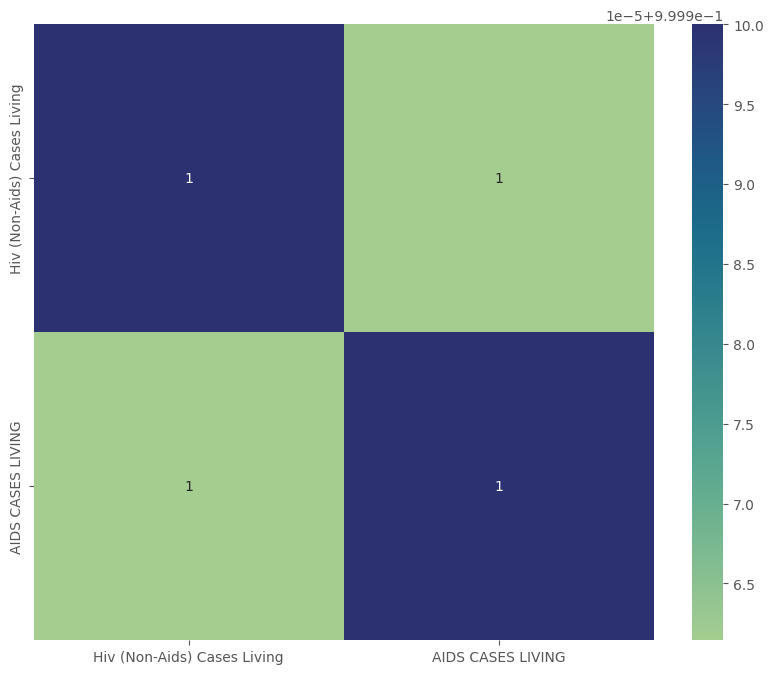

In [28]:
plt.subplots(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='crest')
plt.show()

In [93]:
group = df1_copy.groupby('County')[["AIDS CASES LIVING","Hiv (Non-Aids) Cases Living"]].mean()

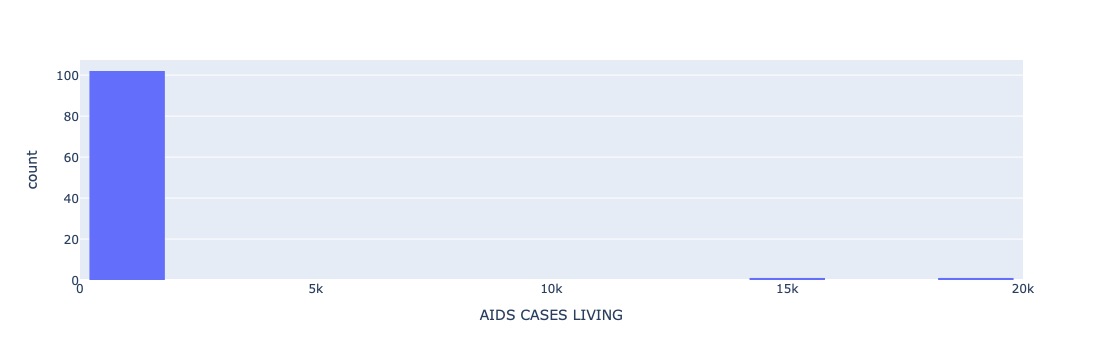

In [94]:
# histogram plot for the mean data
fig = px.histogram(group, x = "AIDS CASES LIVING", nbins=10)
fig.update_layout(bargap=0.2)
fig.show()

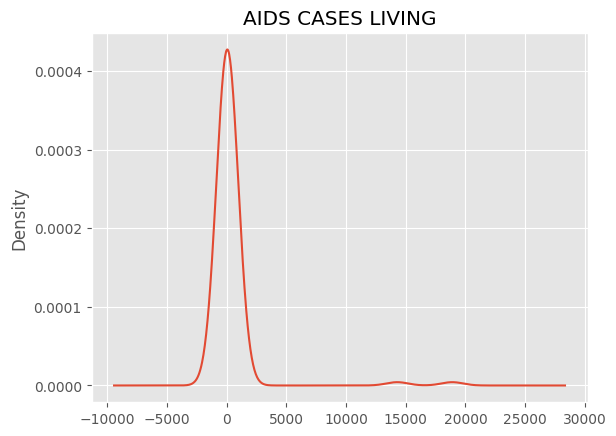

In [95]:
# distribution plot
fig = group['AIDS CASES LIVING'].plot(kind='kde', title="AIDS CASES LIVING")
plt.show()

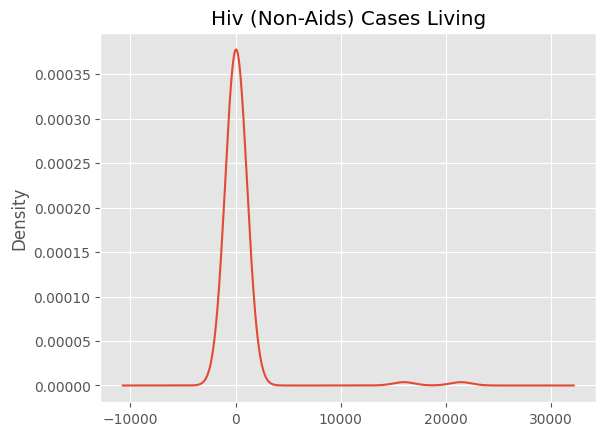

In [96]:
fig = group['Hiv (Non-Aids) Cases Living'].plot(kind='kde', title="Hiv (Non-Aids) Cases Living")
plt.show()

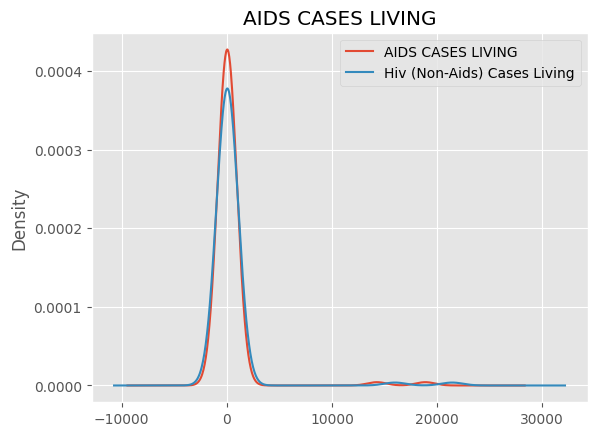

In [97]:
# Both columns
fig = group.plot(kind='kde', title="AIDS CASES LIVING")
plt.show()

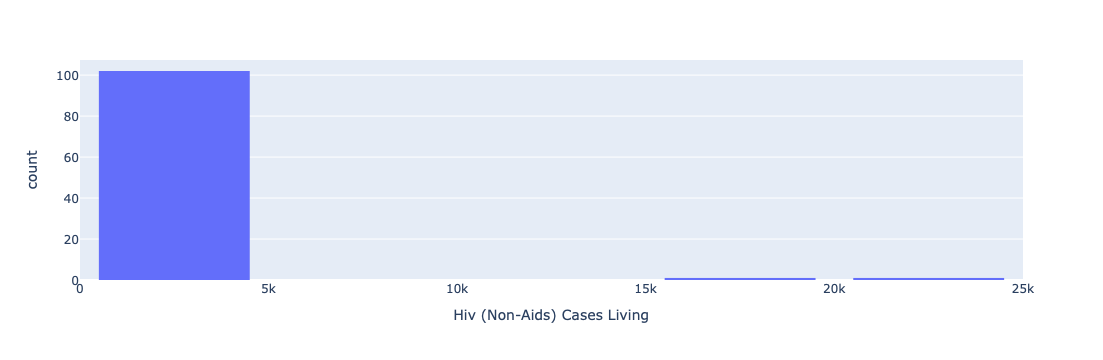

In [98]:
# Histogram for Hiv (Non-Aids) Cases
fig = px.histogram(group, x ="Hiv (Non-Aids) Cases Living",nbins=10)
fig.update_layout(bargap=0.2)
fig.show()

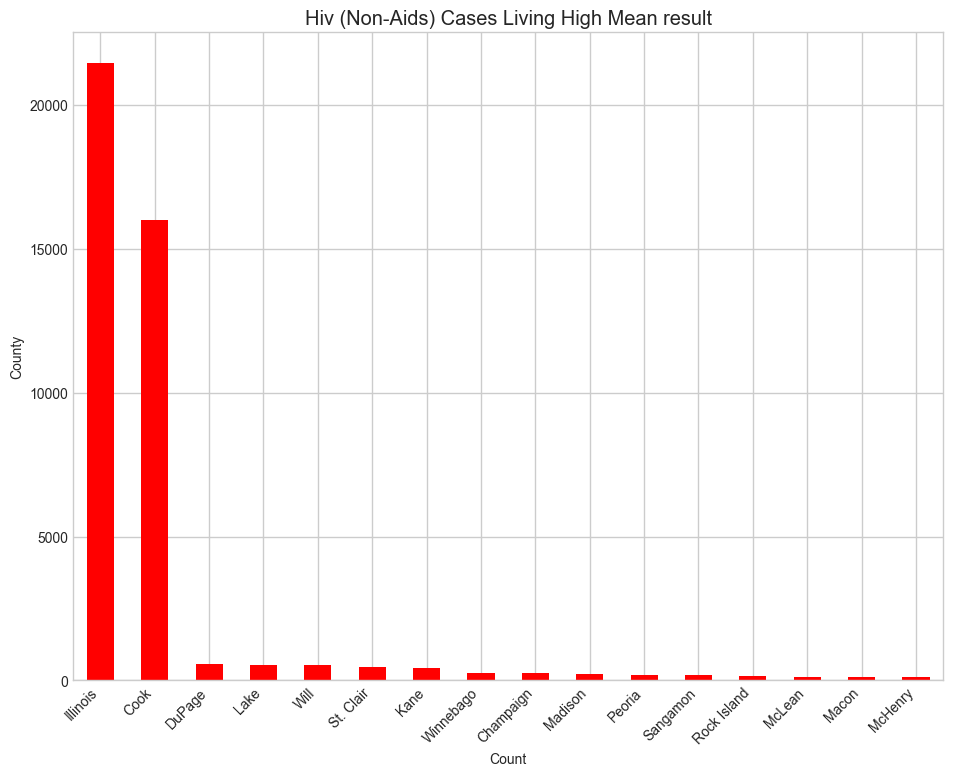

In [163]:
# getting the highest mean values of a county
Hiv_High_Mean_Cases = group.loc[group['Hiv (Non-Aids) Cases Living'] > 100,['Hiv (Non-Aids) Cases Living']]
# plotting a bar graph for the dataframe Hiv_High_mean_cases
Hiv_High_Mean_Cases.sort_values(by='Hiv (Non-Aids) Cases Living',ascending=False, inplace=True)
fig = Hiv_High_Mean_Cases.plot(kind='bar', figsize=(10, 8), color ='red', title = 'Hiv (Non-Aids) Cases Living High Mean result', legend=False)
fig.tick_params(axis='y', labelsize=10)
fig.tick_params(axis='x', labelsize=10)
fig.set_ylabel('County', fontsize=10)
fig.set_xlabel('Count', fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.show()

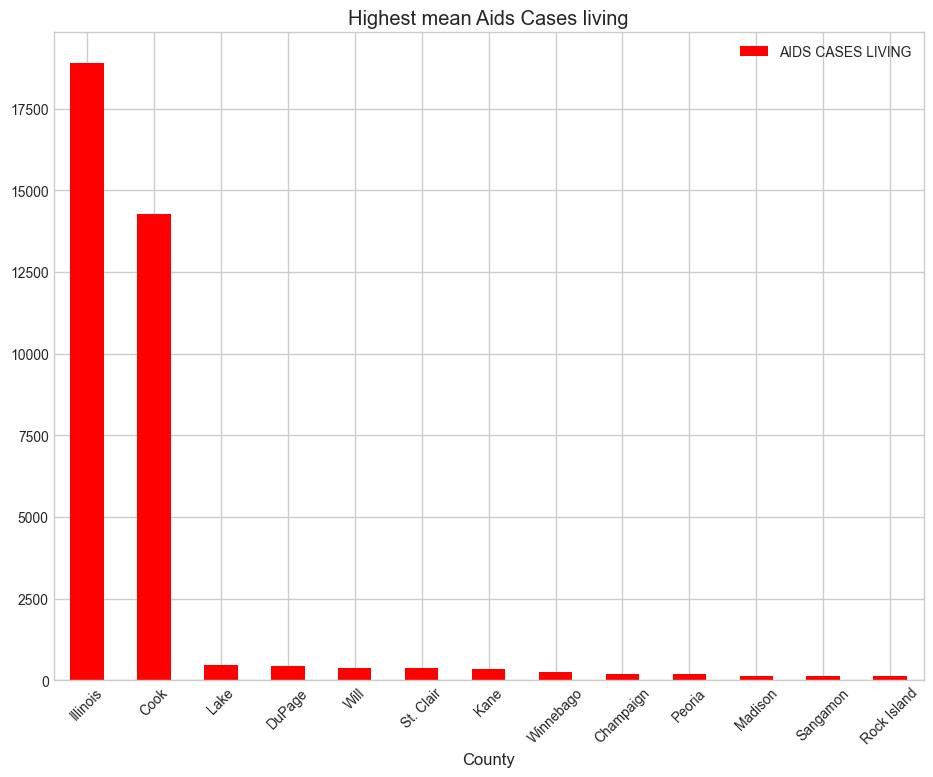

In [164]:
# Aids cases Living with highest mean above 100
Aids_Cases_Living = group.loc[group['AIDS CASES LIVING']>100,['AIDS CASES LIVING']]
Aids_Cases_Living.sort_values(by='AIDS CASES LIVING',ascending=False, inplace=True)
fig = Aids_Cases_Living.plot(kind='bar', figsize=(10, 8), color ='red', title = 'Highest mean Aids Cases living')
fig.legend(loc='upper right')
fig.label_outer
plt.xticks(rotation=45)
plt.show()

In [225]:
# view it using bubble chart
highvalue = df1_copy.copy()
highvaluesort = highvalue.sort_values(by='Hiv (Non-Aids) Cases Living', ascending=False)
highValueSortScatter = highvaluesort.loc[highvaluesort['Hiv (Non-Aids) Cases Living']> 200]
# plotting using a scatter plot
sizes = [20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170]  # Sizes of the bubbles 
fig = go.Figure(data=[go.Scatter(
        x=highValueSortScatter['Hiv (Non-Aids) Cases Living'], y=highValueSortScatter['AIDS CASES LIVING'],
        hover_name=highValueSortScatter['County'],color=highValueSortScatter['County'],colorscale='Viridis',
        mode='markers',marker=dict(size=sizes, sizemode='diameter',sizeref=0.1,showscale=True
))])
fig.show()

ValueError: Invalid property specified for object of type plotly.graph_objs.Scatter: 'color'

Did you mean "fill"?

    Valid properties:
        alignmentgroup
            Set several traces linked to the same position axis or
            matching axes to the same alignmentgroup. This controls
            whether bars compute their positional range dependently
            or independently.
        cliponaxis
            Determines whether or not markers and text nodes are
            clipped about the subplot axes. To show markers and
            text nodes above axis lines and tick labels, make sure
            to set `xaxis.layer` and `yaxis.layer` to *below
            traces*.
        connectgaps
            Determines whether or not gaps (i.e. {nan} or missing
            values) in the provided data arrays are connected.
        customdata
            Assigns extra data each datum. This may be useful when
            listening to hover, click and selection events. Note
            that, "scatter" traces also appends customdata items in
            the markers DOM elements
        customdatasrc
            Sets the source reference on Chart Studio Cloud for
            `customdata`.
        dx
            Sets the x coordinate step. See `x0` for more info.
        dy
            Sets the y coordinate step. See `y0` for more info.
        error_x
            :class:`plotly.graph_objects.scatter.ErrorX` instance
            or dict with compatible properties
        error_y
            :class:`plotly.graph_objects.scatter.ErrorY` instance
            or dict with compatible properties
        fill
            Sets the area to fill with a solid color. Defaults to
            "none" unless this trace is stacked, then it gets
            "tonexty" ("tonextx") if `orientation` is "v" ("h") Use
            with `fillcolor` if not "none". "tozerox" and "tozeroy"
            fill to x=0 and y=0 respectively. "tonextx" and
            "tonexty" fill between the endpoints of this trace and
            the endpoints of the trace before it, connecting those
            endpoints with straight lines (to make a stacked area
            graph); if there is no trace before it, they behave
            like "tozerox" and "tozeroy". "toself" connects the
            endpoints of the trace (or each segment of the trace if
            it has gaps) into a closed shape. "tonext" fills the
            space between two traces if one completely encloses the
            other (eg consecutive contour lines), and behaves like
            "toself" if there is no trace before it. "tonext"
            should not be used if one trace does not enclose the
            other. Traces in a `stackgroup` will only fill to (or
            be filled to) other traces in the same group. With
            multiple `stackgroup`s or some traces stacked and some
            not, if fill-linked traces are not already consecutive,
            the later ones will be pushed down in the drawing
            order.
        fillcolor
            Sets the fill color. Defaults to a half-transparent
            variant of the line color, marker color, or marker line
            color, whichever is available. If fillgradient is
            specified, fillcolor is ignored except for setting the
            background color of the hover label, if any.
        fillgradient
            Sets a fill gradient. If not specified, the fillcolor
            is used instead.
        fillpattern
            Sets the pattern within the marker.
        groupnorm
            Only relevant when `stackgroup` is used, and only the
            first `groupnorm` found in the `stackgroup` will be
            used - including if `visible` is "legendonly" but not
            if it is `false`. Sets the normalization for the sum of
            this `stackgroup`. With "fraction", the value of each
            trace at each location is divided by the sum of all
            trace values at that location. "percent" is the same
            but multiplied by 100 to show percentages. If there are
            multiple subplots, or multiple `stackgroup`s on one
            subplot, each will be normalized within its own set.
        hoverinfo
            Determines which trace information appear on hover. If
            `none` or `skip` are set, no information is displayed
            upon hovering. But, if `none` is set, click and hover
            events are still fired.
        hoverinfosrc
            Sets the source reference on Chart Studio Cloud for
            `hoverinfo`.
        hoverlabel
            :class:`plotly.graph_objects.scatter.Hoverlabel`
            instance or dict with compatible properties
        hoveron
            Do the hover effects highlight individual points
            (markers or line points) or do they highlight filled
            regions? If the fill is "toself" or "tonext" and there
            are no markers or text, then the default is "fills",
            otherwise it is "points".
        hovertemplate
            Template string used for rendering the information that
            appear on hover box. Note that this will override
            `hoverinfo`. Variables are inserted using %{variable},
            for example "y: %{y}" as well as %{xother}, {%_xother},
            {%_xother_}, {%xother_}. When showing info for several
            points, "xother" will be added to those with different
            x positions from the first point. An underscore before
            or after "(x|y)other" will add a space on that side,
            only when this field is shown. Numbers are formatted
            using d3-format's syntax %{variable:d3-format}, for
            example "Price: %{y:$.2f}".
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format
            for details on the formatting syntax. Dates are
            formatted using d3-time-format's syntax
            %{variable|d3-time-format}, for example "Day:
            %{2019-01-01|%A}". https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format for details on the
            date formatting syntax. The variables available in
            `hovertemplate` are the ones emitted as event data
            described at this link
            https://plotly.com/javascript/plotlyjs-events/#event-
            data. Additionally, every attributes that can be
            specified per-point (the ones that are `arrayOk: true`)
            are available.  Anything contained in tag `<extra>` is
            displayed in the secondary box, for example
            "<extra>{fullData.name}</extra>". To hide the secondary
            box completely, use an empty tag `<extra></extra>`.
        hovertemplatesrc
            Sets the source reference on Chart Studio Cloud for
            `hovertemplate`.
        hovertext
            Sets hover text elements associated with each (x,y)
            pair. If a single string, the same string appears over
            all the data points. If an array of string, the items
            are mapped in order to the this trace's (x,y)
            coordinates. To be seen, trace `hoverinfo` must contain
            a "text" flag.
        hovertextsrc
            Sets the source reference on Chart Studio Cloud for
            `hovertext`.
        ids
            Assigns id labels to each datum. These ids for object
            constancy of data points during animation. Should be an
            array of strings, not numbers or any other type.
        idssrc
            Sets the source reference on Chart Studio Cloud for
            `ids`.
        legend
            Sets the reference to a legend to show this trace in.
            References to these legends are "legend", "legend2",
            "legend3", etc. Settings for these legends are set in
            the layout, under `layout.legend`, `layout.legend2`,
            etc.
        legendgroup
            Sets the legend group for this trace. Traces and shapes
            part of the same legend group hide/show at the same
            time when toggling legend items.
        legendgrouptitle
            :class:`plotly.graph_objects.scatter.Legendgrouptitle`
            instance or dict with compatible properties
        legendrank
            Sets the legend rank for this trace. Items and groups
            with smaller ranks are presented on top/left side while
            with "reversed" `legend.traceorder` they are on
            bottom/right side. The default legendrank is 1000, so
            that you can use ranks less than 1000 to place certain
            items before all unranked items, and ranks greater than
            1000 to go after all unranked items. When having
            unranked or equal rank items shapes would be displayed
            after traces i.e. according to their order in data and
            layout.
        legendwidth
            Sets the width (in px or fraction) of the legend for
            this trace.
        line
            :class:`plotly.graph_objects.scatter.Line` instance or
            dict with compatible properties
        marker
            :class:`plotly.graph_objects.scatter.Marker` instance
            or dict with compatible properties
        meta
            Assigns extra meta information associated with this
            trace that can be used in various text attributes.
            Attributes such as trace `name`, graph, axis and
            colorbar `title.text`, annotation `text`
            `rangeselector`, `updatemenues` and `sliders` `label`
            text all support `meta`. To access the trace `meta`
            values in an attribute in the same trace, simply use
            `%{meta[i]}` where `i` is the index or key of the
            `meta` item in question. To access trace `meta` in
            layout attributes, use `%{data[n[.meta[i]}` where `i`
            is the index or key of the `meta` and `n` is the trace
            index.
        metasrc
            Sets the source reference on Chart Studio Cloud for
            `meta`.
        mode
            Determines the drawing mode for this scatter trace. If
            the provided `mode` includes "text" then the `text`
            elements appear at the coordinates. Otherwise, the
            `text` elements appear on hover. If there are less than
            20 points and the trace is not stacked then the default
            is "lines+markers". Otherwise, "lines".
        name
            Sets the trace name. The trace name appears as the
            legend item and on hover.
        offsetgroup
            Set several traces linked to the same position axis or
            matching axes to the same offsetgroup where bars of the
            same position coordinate will line up.
        opacity
            Sets the opacity of the trace.
        orientation
            Only relevant in the following cases: 1. when
            `scattermode` is set to "group". 2. when `stackgroup`
            is used, and only the first `orientation` found in the
            `stackgroup` will be used - including if `visible` is
            "legendonly" but not if it is `false`. Sets the
            stacking direction. With "v" ("h"), the y (x) values of
            subsequent traces are added. Also affects the default
            value of `fill`.
        selected
            :class:`plotly.graph_objects.scatter.Selected` instance
            or dict with compatible properties
        selectedpoints
            Array containing integer indices of selected points.
            Has an effect only for traces that support selections.
            Note that an empty array means an empty selection where
            the `unselected` are turned on for all points, whereas,
            any other non-array values means no selection all where
            the `selected` and `unselected` styles have no effect.
        showlegend
            Determines whether or not an item corresponding to this
            trace is shown in the legend.
        stackgaps
            Only relevant when `stackgroup` is used, and only the
            first `stackgaps` found in the `stackgroup` will be
            used - including if `visible` is "legendonly" but not
            if it is `false`. Determines how we handle locations at
            which other traces in this group have data but this one
            does not. With *infer zero* we insert a zero at these
            locations. With "interpolate" we linearly interpolate
            between existing values, and extrapolate a constant
            beyond the existing values.
        stackgroup
            Set several scatter traces (on the same subplot) to the
            same stackgroup in order to add their y values (or
            their x values if `orientation` is "h"). If blank or
            omitted this trace will not be stacked. Stacking also
            turns `fill` on by default, using "tonexty" ("tonextx")
            if `orientation` is "h" ("v") and sets the default
            `mode` to "lines" irrespective of point count. You can
            only stack on a numeric (linear or log) axis. Traces in
            a `stackgroup` will only fill to (or be filled to)
            other traces in the same group. With multiple
            `stackgroup`s or some traces stacked and some not, if
            fill-linked traces are not already consecutive, the
            later ones will be pushed down in the drawing order.
        stream
            :class:`plotly.graph_objects.scatter.Stream` instance
            or dict with compatible properties
        text
            Sets text elements associated with each (x,y) pair. If
            a single string, the same string appears over all the
            data points. If an array of string, the items are
            mapped in order to the this trace's (x,y) coordinates.
            If trace `hoverinfo` contains a "text" flag and
            "hovertext" is not set, these elements will be seen in
            the hover labels.
        textfont
            Sets the text font.
        textposition
            Sets the positions of the `text` elements with respects
            to the (x,y) coordinates.
        textpositionsrc
            Sets the source reference on Chart Studio Cloud for
            `textposition`.
        textsrc
            Sets the source reference on Chart Studio Cloud for
            `text`.
        texttemplate
            Template string used for rendering the information text
            that appear on points. Note that this will override
            `textinfo`. Variables are inserted using %{variable},
            for example "y: %{y}". Numbers are formatted using
            d3-format's syntax %{variable:d3-format}, for example
            "Price: %{y:$.2f}".
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format
            for details on the formatting syntax. Dates are
            formatted using d3-time-format's syntax
            %{variable|d3-time-format}, for example "Day:
            %{2019-01-01|%A}". https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format for details on the
            date formatting syntax. Every attributes that can be
            specified per-point (the ones that are `arrayOk: true`)
            are available.
        texttemplatesrc
            Sets the source reference on Chart Studio Cloud for
            `texttemplate`.
        uid
            Assign an id to this trace, Use this to provide object
            constancy between traces during animations and
            transitions.
        uirevision
            Controls persistence of some user-driven changes to the
            trace: `constraintrange` in `parcoords` traces, as well
            as some `editable: true` modifications such as `name`
            and `colorbar.title`. Defaults to `layout.uirevision`.
            Note that other user-driven trace attribute changes are
            controlled by `layout` attributes: `trace.visible` is
            controlled by `layout.legend.uirevision`,
            `selectedpoints` is controlled by
            `layout.selectionrevision`, and `colorbar.(x|y)`
            (accessible with `config: {editable: true}`) is
            controlled by `layout.editrevision`. Trace changes are
            tracked by `uid`, which only falls back on trace index
            if no `uid` is provided. So if your app can add/remove
            traces before the end of the `data` array, such that
            the same trace has a different index, you can still
            preserve user-driven changes if you give each trace a
            `uid` that stays with it as it moves.
        unselected
            :class:`plotly.graph_objects.scatter.Unselected`
            instance or dict with compatible properties
        visible
            Determines whether or not this trace is visible. If
            "legendonly", the trace is not drawn, but can appear as
            a legend item (provided that the legend itself is
            visible).
        x
            Sets the x coordinates.
        x0
            Alternate to `x`. Builds a linear space of x
            coordinates. Use with `dx` where `x0` is the starting
            coordinate and `dx` the step.
        xaxis
            Sets a reference between this trace's x coordinates and
            a 2D cartesian x axis. If "x" (the default value), the
            x coordinates refer to `layout.xaxis`. If "x2", the x
            coordinates refer to `layout.xaxis2`, and so on.
        xcalendar
            Sets the calendar system to use with `x` date data.
        xhoverformat
            Sets the hover text formatting rulefor `x`  using d3
            formatting mini-languages which are very similar to
            those in Python. For numbers, see:
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format.
            And for dates see: https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format. We add two items to
            d3's date formatter: "%h" for half of the year as a
            decimal number as well as "%{n}f" for fractional
            seconds with n digits. For example, *2016-10-13
            09:15:23.456* with tickformat "%H~%M~%S.%2f" would
            display *09~15~23.46*By default the values are
            formatted using `xaxis.hoverformat`.
        xperiod
            Only relevant when the axis `type` is "date". Sets the
            period positioning in milliseconds or "M<n>" on the x
            axis. Special values in the form of "M<n>" could be
            used to declare the number of months. In this case `n`
            must be a positive integer.
        xperiod0
            Only relevant when the axis `type` is "date". Sets the
            base for period positioning in milliseconds or date
            string on the x0 axis. When `x0period` is round number
            of weeks, the `x0period0` by default would be on a
            Sunday i.e. 2000-01-02, otherwise it would be at
            2000-01-01.
        xperiodalignment
            Only relevant when the axis `type` is "date". Sets the
            alignment of data points on the x axis.
        xsrc
            Sets the source reference on Chart Studio Cloud for
            `x`.
        y
            Sets the y coordinates.
        y0
            Alternate to `y`. Builds a linear space of y
            coordinates. Use with `dy` where `y0` is the starting
            coordinate and `dy` the step.
        yaxis
            Sets a reference between this trace's y coordinates and
            a 2D cartesian y axis. If "y" (the default value), the
            y coordinates refer to `layout.yaxis`. If "y2", the y
            coordinates refer to `layout.yaxis2`, and so on.
        ycalendar
            Sets the calendar system to use with `y` date data.
        yhoverformat
            Sets the hover text formatting rulefor `y`  using d3
            formatting mini-languages which are very similar to
            those in Python. For numbers, see:
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format.
            And for dates see: https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format. We add two items to
            d3's date formatter: "%h" for half of the year as a
            decimal number as well as "%{n}f" for fractional
            seconds with n digits. For example, *2016-10-13
            09:15:23.456* with tickformat "%H~%M~%S.%2f" would
            display *09~15~23.46*By default the values are
            formatted using `yaxis.hoverformat`.
        yperiod
            Only relevant when the axis `type` is "date". Sets the
            period positioning in milliseconds or "M<n>" on the y
            axis. Special values in the form of "M<n>" could be
            used to declare the number of months. In this case `n`
            must be a positive integer.
        yperiod0
            Only relevant when the axis `type` is "date". Sets the
            base for period positioning in milliseconds or date
            string on the y0 axis. When `y0period` is round number
            of weeks, the `y0period0` by default would be on a
            Sunday i.e. 2000-01-02, otherwise it would be at
            2000-01-01.
        yperiodalignment
            Only relevant when the axis `type` is "date". Sets the
            alignment of data points on the y axis.
        ysrc
            Sets the source reference on Chart Studio Cloud for
            `y`.
        zorder
            Sets the layer on which this trace is displayed,
            relative to other SVG traces on the same subplot. SVG
            traces with higher `zorder` appear in front of those
            with lower `zorder`.
        
Did you mean "fill"?

Bad property path:
color
^^^^^

In [208]:
highValueSortScatter

,County,Hiv (Non-Aids) Cases Living,AIDS CASES LIVING
103,Illinois,21447,18891
15,Cook,16000,14277
21,DuPage,572,440
48,Lake,541,461
98,Will,528,385
81,St. Clair,473,378
44,Kane,419,361
100,Winnebago,275,255
9,Champaign,256,207
59,Madison,209,146


In [ ]:
df1_copy.to_csv('Hiv(Non)AidsCases.csv')

In [146]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']